<a href="https://colab.research.google.com/github/tomasbelak24/deeplearning-vision/blob/main/hw1/activation_functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework

The first homework will consist of practical testing of the things we just mentioned. It is divided into several parts. The output of the task can be either multiple notebooks or python scripts that you used to run the experiments. The output should also contain a pdf file with results and graphs that will demonstrate your claims.

The core of the homework will be training the network on the Cifar-10 dataset. You will always then compare how different modifications of the network work against others or against some baseline. The task will consist of several parts.

*Note:* You can also solve the task in Keras or another framework, but you must first agree with me.

### Basic model (1pt)

The goal is to ideally design the fastest possible model that will reach approx. 70 percent accuracy on Cifar-10 dataset. This model will serve as a baseline for further modifications. Use the Adam optimizer and ReLU activations within the model. The beginning of the model should consist of a few convolutional and pooling layers. There should be a fully connected part at the end.

In the remaining tasks, it is always necessary to change some part of the model and compare them with each other using graphs that show the development of validation accuracy and error. Instead of graphs, it is possible to use a table, but it makes sense to list only the values at the end of training.

### Activations (3pt)

Try swapping the activation functions. Test three of the following activation functions sigmoid, tanh, ELU, LeakyReLU and PReLU. You can also test LeakyReLU for different values of the alpha parameter (e.g. 0.3, 0.1, 0.03).

### Optimization (4pt)

Test training with Adam, SGD or RMSProp optimizers. Run at least 4 different configurations (different steps, different alpha, beta, etc). For this task, it is advisable to use the graphs in the pdf.

Choose one method and additionally test three other minibatch sizes for it.

### Dropout and Augmentation (4pt)

Test the dropout so that it is first only in the fully connected layer (p = 0.5) and then also after the convolutional layers (p = 0.2). And one more option. Remember to use Dropout2d instead of Dropout1d when using in convolution layers.

Test augmentation for 3 different settings. You can be creative, but it should at least make sense. Documentation can be found [here](https://pytorch.org/vision/stable/transforms.html). Be careful to do it right.

Test both things for two cases in one you use a regular split on train/val and in the other you leave only the first 1000 examples in the training set. Be aware that the number of training steps is smaller for the second case, so use proportionately more epochs.

### Deep web (3pt)

Design a deep (narrow is enough, but have at least 11 layers) network. Test it first without BatchNorm, residual or dense links, or additional training layers. Finally, test at least two of these approaches so that you have at least 3 different models (ie, different placements of these elements).

Note: If you want to test residual or dense connections, design the network in such a way that there is a place to put them.

### Best model (3pt)

Create a model that achieves the best result you can. These points are extra and do not count towards the total number of points. The models submitted by others will be taken into account. Submit the model as a .pth torch state dict along with one script that loads the model and calculates the accuracy on the Cifar-10 test set. Describe your procedure for creating the model. You can get inspiration from the internet, but don't download or use pre-trained models. If you are inspired by something too much, then at least describe why that particular model should work well (please don't write here that it is because some blog says so).

## Points

The task is relatively straightforward, as its goal is rather to gain experience. However it can take quite a lot of time to train the models. You can usually choose several parameters for tasks. Therefore, it does not matter if some of them are meaningless, such as a very big learning step, as knowing what doesn't work is also important. However, I will deduct points if there are almost no settings in a section that make sense/good results. It would be ideal if you tried, for example after the first three settings, to find the "best" setting. Also if you claim some nonsense in the pdf you could get some points deducted.

## Submission

Submit the task in a zip with notebooks/scripts, a pdf with the results and your model to the e-mail address `kocurvik@gmail.com' Divide the pdf into sections like here and ideally also into sub-sections where it makes sense. Always write a comment on the results about how they turned out.

**The deadline** will be posted on [Github](https://github.com/kocurvik/edu/blob/master/HUPV/README_en.md). I will deduct points for late submissions.


## Homework no. 1 (15b) - Alternative

As an alternative to the first homework, one of the notebooks from the exercises can be rewritten into another framework. Target frameworks can be, for example, JAX, or something else. If you are interested in this form of the first home homework please discuss this option with me.

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

import numpy as np
from matplotlib import pyplot as plt

100%|██████████| 170M/170M [00:04<00:00, 39.9MB/s]


torch.Size([1, 3, 32, 32])


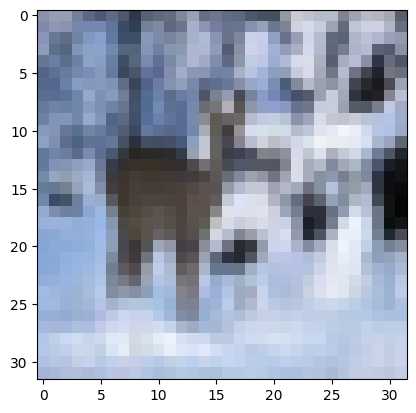

tensor([4])
deer
torch.Size([1, 3, 32, 32])


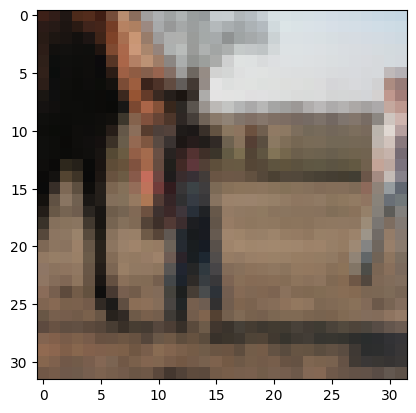

tensor([7])
horse
torch.Size([1, 3, 32, 32])


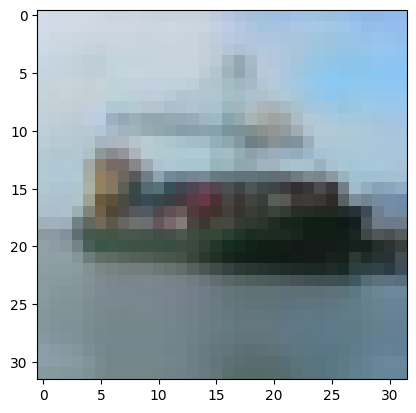

tensor([8])
ship
torch.Size([1, 3, 32, 32])


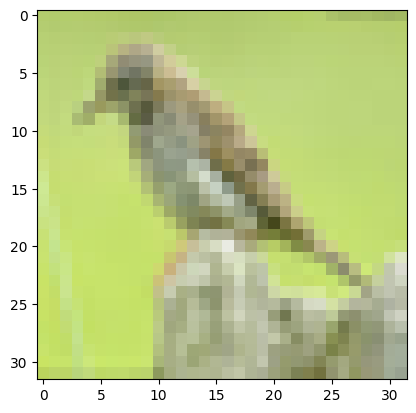

tensor([2])
bird
torch.Size([1, 3, 32, 32])


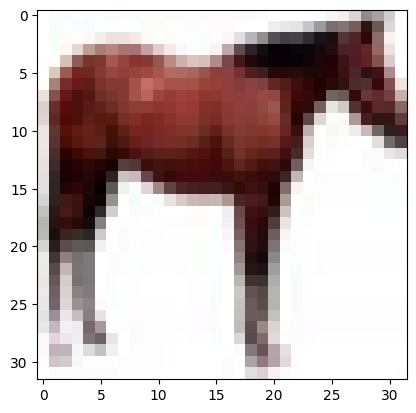

tensor([7])
horse
torch.Size([1, 3, 32, 32])


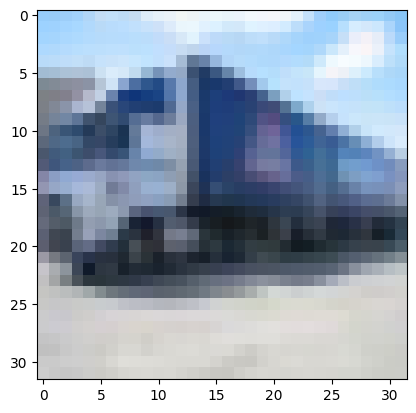

tensor([9])
truck
torch.Size([1, 3, 32, 32])


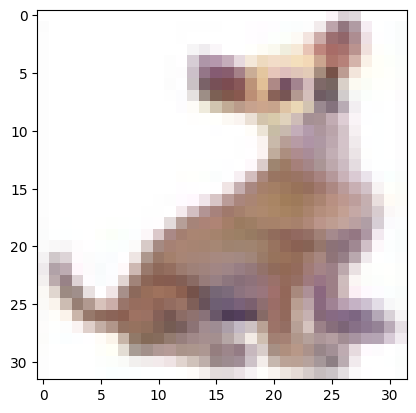

tensor([5])
dog
torch.Size([1, 3, 32, 32])


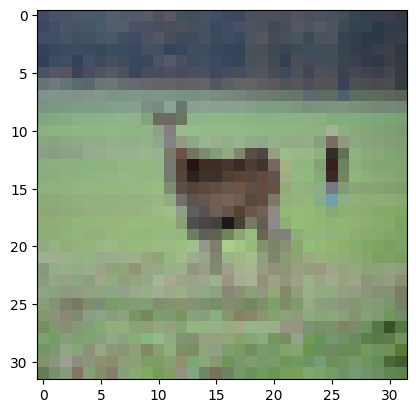

tensor([4])
deer
torch.Size([1, 3, 32, 32])


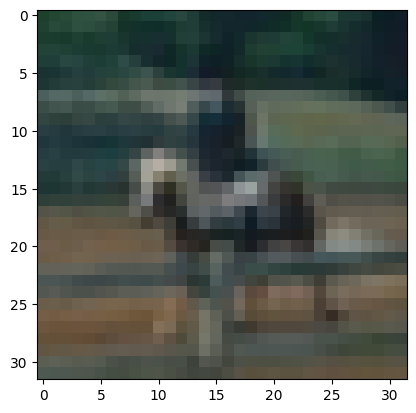

tensor([7])
horse
torch.Size([1, 3, 32, 32])


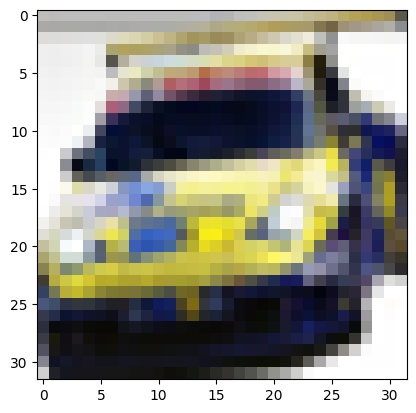

tensor([1])
car
torch.Size([1, 3, 32, 32])


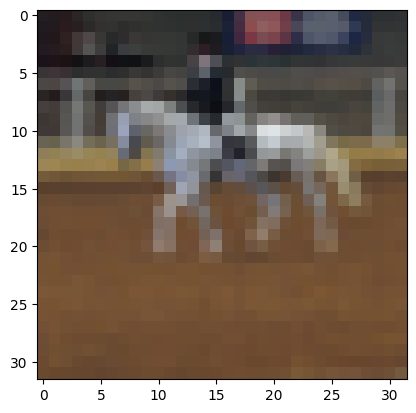

tensor([7])
horse


In [2]:
# @title Loading CIFAR10 dataset

#reused code from the 5th lab

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

transform = transforms.ToTensor()

dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# for reproducibility
trainset, valset = torch.utils.data.random_split(dataset, [45000, 5000], generator=torch.Generator().manual_seed(42))

previewloader = torch.utils.data.DataLoader(testset, batch_size=1, shuffle=True)

for i, sample in enumerate(previewloader):
  if i > 10:
    break
  x, y = sample
  print(x.shape)
  img = np.moveaxis(x.numpy()[0], 0, -1)
  plt.imshow(img)
  plt.show()
  print(y)
  print(classes[y.item()])

### Basic model (1pt)

The goal is to ideally design the fastest possible model that will reach approx. 70 percent accuracy on Cifar-10 dataset. This model will serve as a baseline for further modifications. Use the Adam optimizer and ReLU activations within the model. The beginning of the model should consist of a few convolutional and pooling layers. There should be a fully connected part at the end.

In the remaining tasks, it is always necessary to change some part of the model and compare them with each other using graphs that show the development of validation accuracy and error. Instead of graphs, it is possible to use a table, but it makes sense to list only the values at the end of training.

In [3]:
from torch.nn import Sequential, Linear, ReLU, Softmax, Conv2d, MaxPool2d, Flatten, AdaptiveAvgPool2d

def build_model():
  # We have three channels on input in shape N x 3 x 32 x 32
  model = Sequential(
      Conv2d(3, 32, 3), MaxPool2d(2), ReLU(),
      Conv2d(32, 64, 3), MaxPool2d(2), ReLU(),
      Conv2d(64, 128, 3), MaxPool2d(2), ReLU(),
      AdaptiveAvgPool2d(1),Flatten(),
      Linear(128, 64), ReLU(),
      Linear(64, 32), ReLU(),
      Linear(32, 10))

  model_inference = Sequential(model, Softmax(dim=1))
  return model, model_inference

model, model_inference = build_model()

out = model_inference(torch.from_numpy(np.zeros([1, 3, 32, 32], dtype=np.float32)))
print(out.size())
print(out)
print(classes[out.argmax().item()])

torch.Size([1, 10])
tensor([[0.0866, 0.1084, 0.1045, 0.1002, 0.1034, 0.1066, 0.0860, 0.1193, 0.1008,
         0.0841]], grad_fn=<SoftmaxBackward0>)
horse


In [4]:
def one_epoch(model, loss, optimizer, dataloader_train, dataloader_val, verbose=True):
  train_losses = []
  val_losses = []

  model.train()
  for i, batch in enumerate(dataloader_train):
    x, y = batch[0].to(device), batch[1].to(device)
    optimizer.zero_grad()

    out = model(x)
    loss = ce_loss(out, y)
    loss.backward()
    train_losses.append(loss.item())
    optimizer.step()
    if i % 100 == 0 and verbose:
      print("Training loss at step {}: {}".format(i, loss.item()))

  model.eval()
  with torch.no_grad():
    correct = 0
    total = 0
    for i, batch in enumerate(dataloader_val):
      x, y = batch[0].to(device), batch[1].to(device)

      out = model(x)
      loss = ce_loss(out, y)
      acc = torch.sum(torch.argmax(out, dim=-1) == y)
      correct += acc.item()
      total += len(batch[1])
      val_losses.append(loss.item())

  val_acc = correct / total

  return np.mean(train_losses), np.mean(val_losses), val_acc

Using device:  cuda:0
Training loss at step 0: 2.2978551387786865
Training loss at step 100: 2.108091354370117
Training loss at step 200: 2.154923915863037
Training loss at step 300: 1.9687786102294922
Training loss at step 400: 1.977150559425354
Training loss at step 500: 2.0698981285095215
Training loss at step 600: 1.9654455184936523
Training loss at step 700: 1.9393119812011719
Training loss at step 800: 1.8529131412506104
Training loss at step 900: 1.9667441844940186
Training loss at step 1000: 1.687400221824646
Training loss at step 1100: 1.5421552658081055
Training loss at step 1200: 1.7048571109771729
Training loss at step 1300: 1.8585925102233887
Training loss at step 1400: 1.6262824535369873
Val loss at epoch 0: 1.6576394541248394
Val acc at epoch 0: 0.373
Training loss at step 0: 1.7247438430786133
Training loss at step 100: 1.7827413082122803
Training loss at step 200: 1.3559198379516602
Training loss at step 300: 1.4748889207839966
Training loss at step 400: 1.634685158729

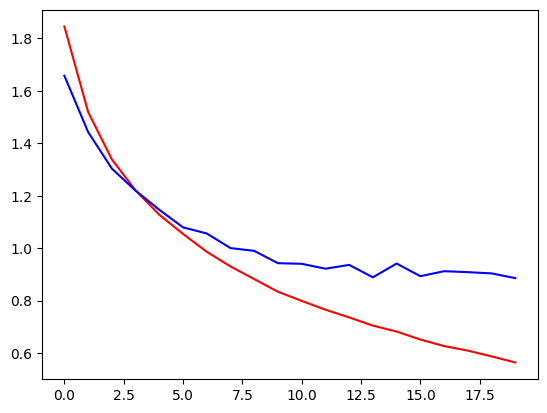

In [5]:
batch_size = 32

dataloader_train = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
dataloader_val = torch.utils.data.DataLoader(valset, batch_size=batch_size, shuffle=False)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Using device: ", device)

ce_loss = torch.nn.CrossEntropyLoss().to(device)

model, model_inference = build_model()

model.to(device)
model_inference.to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

epoch_train_losses = []
epoch_val_losses = []
epoch_val_accs = []

for e in range(20):
  train_loss, val_loss, val_acc = one_epoch(model, ce_loss, optimizer, dataloader_train, dataloader_val)

  print("Val loss at epoch {}: {}".format(e, val_loss))
  print("Val acc at epoch {}: {}".format(e, val_acc))

  epoch_train_losses.append(train_loss)
  epoch_val_losses.append(val_loss)
  epoch_val_accs.append(val_acc)

plt.plot(epoch_train_losses, c='r')
plt.plot(epoch_val_losses, c='b')
plt.show()

### Activations (3pt)

Try swapping the activation functions. Test three of the following activation functions sigmoid, tanh, ELU, LeakyReLU and PReLU. You can also test LeakyReLU for different values of the alpha parameter (e.g. 0.3, 0.1, 0.03).

In [6]:
from torch.nn import Sequential, Linear, ReLU, Softmax, Sigmoid, ELU, LeakyReLU, PReLU, Conv2d, MaxPool2d, Flatten, AdaptiveAvgPool2d

def build_model_task2(activation_function = ReLU):
  # We have three channels on input in shape N x 3 x 32 x 32
  model = Sequential(
      Conv2d(3, 32, 3), MaxPool2d(2), activation_function(),
      Conv2d(32, 64, 3), MaxPool2d(2), activation_function(),
      Conv2d(64, 128, 3), MaxPool2d(2), activation_function(),
      AdaptiveAvgPool2d(1),Flatten(),
      Linear(128, 64), activation_function(),
      Linear(64, 32), activation_function(),
      Linear(32, 10))

  model_inference = Sequential(model, Softmax(dim=1))
  return model, model_inference

model, model_inference = build_model_task2()

out = model_inference(torch.from_numpy(np.zeros([1, 3, 32, 32], dtype=np.float32)))
print(out.size())
print(out)
print(classes[out.argmax().item()])

torch.Size([1, 10])
tensor([[0.0988, 0.1098, 0.1134, 0.0974, 0.0869, 0.1118, 0.0888, 0.0872, 0.1095,
         0.0963]], grad_fn=<SoftmaxBackward0>)
bird


Using device:  cuda:0
Trying activation function:  LeakyReLU(0.3)
Val loss at epoch 0: 1.456134806013411
Val acc at epoch 0: 0.4686
Val loss at epoch 1: 1.2286738187644133
Val acc at epoch 1: 0.5558
Val loss at epoch 2: 1.0487248867180696
Val acc at epoch 2: 0.622
Val loss at epoch 3: 0.9866406461995119
Val acc at epoch 3: 0.6456
Val loss at epoch 4: 0.9320872972725304
Val acc at epoch 4: 0.6708
Val loss at epoch 5: 0.8918481057236909
Val acc at epoch 5: 0.6926
Val loss at epoch 6: 0.8779752241198424
Val acc at epoch 6: 0.6898
Val loss at epoch 7: 0.8368473897694023
Val acc at epoch 7: 0.7078
Val loss at epoch 8: 0.8301088014605699
Val acc at epoch 8: 0.7122
Val loss at epoch 9: 0.8479778121231468
Val acc at epoch 9: 0.7132
Val loss at epoch 10: 0.8140475994842068
Val acc at epoch 10: 0.729
Val loss at epoch 11: 0.8580325948204964
Val acc at epoch 11: 0.718
Val loss at epoch 12: 0.8609751238944424
Val acc at epoch 12: 0.719
Val loss at epoch 13: 0.8968996644779376
Val acc at epoch 13: 

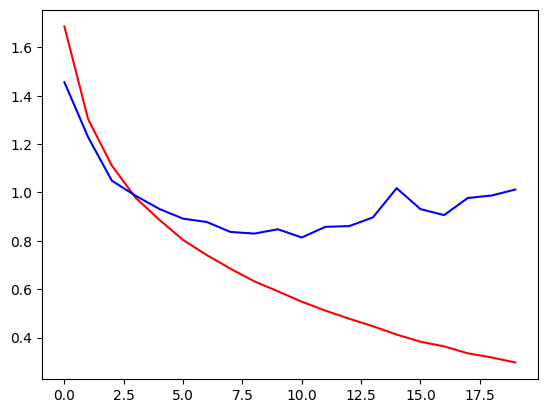

Trying activation function:  LeakyReLU(0.1)
Val loss at epoch 0: 1.4558253500871599
Val acc at epoch 0: 0.4524
Val loss at epoch 1: 1.201371203941904
Val acc at epoch 1: 0.5582
Val loss at epoch 2: 1.1105324781624375
Val acc at epoch 2: 0.6006
Val loss at epoch 3: 1.0328947989044674
Val acc at epoch 3: 0.6314
Val loss at epoch 4: 0.9428001330916289
Val acc at epoch 4: 0.6626
Val loss at epoch 5: 0.8791202261189747
Val acc at epoch 5: 0.6918
Val loss at epoch 6: 0.8690354774711998
Val acc at epoch 6: 0.702
Val loss at epoch 7: 0.8462851620783471
Val acc at epoch 7: 0.7024
Val loss at epoch 8: 0.8714401272072154
Val acc at epoch 8: 0.7022
Val loss at epoch 9: 0.8395504032730297
Val acc at epoch 9: 0.715
Val loss at epoch 10: 0.8458079722276919
Val acc at epoch 10: 0.72
Val loss at epoch 11: 0.817896244442387
Val acc at epoch 11: 0.7284
Val loss at epoch 12: 0.8551923617435868
Val acc at epoch 12: 0.7198
Val loss at epoch 13: 0.9349414161436117
Val acc at epoch 13: 0.7152
Val loss at epoc

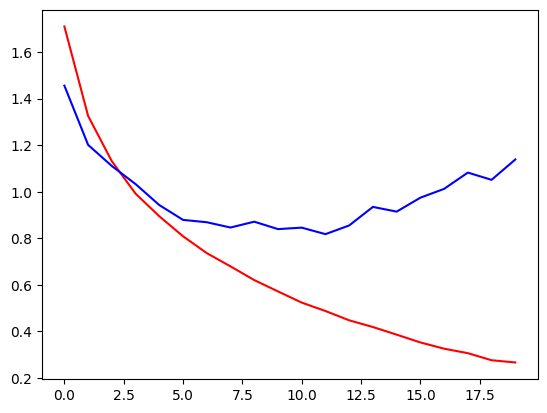

Trying activation function:  LeakyReLU(0.03)
Val loss at epoch 0: 1.5652824549158668
Val acc at epoch 0: 0.4412
Val loss at epoch 1: 1.2687518118293422
Val acc at epoch 1: 0.539
Val loss at epoch 2: 1.1616842355697778
Val acc at epoch 2: 0.5886
Val loss at epoch 3: 1.0355763807418241
Val acc at epoch 3: 0.6302
Val loss at epoch 4: 0.9325722926741193
Val acc at epoch 4: 0.6712
Val loss at epoch 5: 0.8914341789901636
Val acc at epoch 5: 0.683
Val loss at epoch 6: 0.8836260362035909
Val acc at epoch 6: 0.7
Val loss at epoch 7: 0.8138221109368998
Val acc at epoch 7: 0.7188
Val loss at epoch 8: 0.83448225316728
Val acc at epoch 8: 0.711
Val loss at epoch 9: 0.8251365208701723
Val acc at epoch 9: 0.7156
Val loss at epoch 10: 0.8861820432031231
Val acc at epoch 10: 0.7058
Val loss at epoch 11: 0.855663768614933
Val acc at epoch 11: 0.7206
Val loss at epoch 12: 0.8528816303250136
Val acc at epoch 12: 0.7248
Val loss at epoch 13: 0.8893222290619164
Val acc at epoch 13: 0.722
Val loss at epoch 1

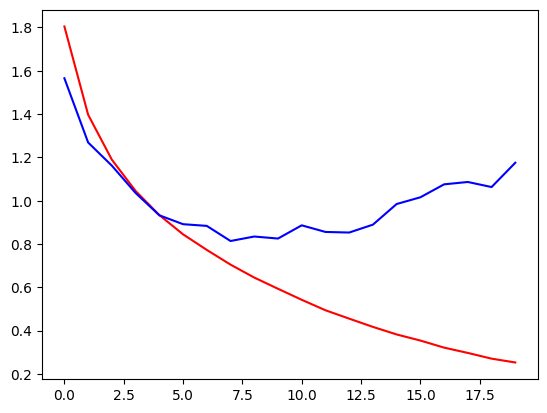

Trying activation function:  LeakyReLU
Val loss at epoch 0: 1.5346385270926604
Val acc at epoch 0: 0.427
Val loss at epoch 1: 1.3208414722400106
Val acc at epoch 1: 0.5208
Val loss at epoch 2: 1.2182887598967096
Val acc at epoch 2: 0.5588
Val loss at epoch 3: 1.0264862119012577
Val acc at epoch 3: 0.625
Val loss at epoch 4: 0.9444270433893629
Val acc at epoch 4: 0.6624
Val loss at epoch 5: 0.993576088718548
Val acc at epoch 5: 0.6502
Val loss at epoch 6: 0.8735233537710396
Val acc at epoch 6: 0.6954
Val loss at epoch 7: 0.8585576656138062
Val acc at epoch 7: 0.7
Val loss at epoch 8: 0.8553519273639485
Val acc at epoch 8: 0.7026
Val loss at epoch 9: 0.8387758008613708
Val acc at epoch 9: 0.714
Val loss at epoch 10: 0.8293647884753099
Val acc at epoch 10: 0.7188
Val loss at epoch 11: 0.8597501759316512
Val acc at epoch 11: 0.7154
Val loss at epoch 12: 0.892334957221511
Val acc at epoch 12: 0.7234
Val loss at epoch 13: 0.8768999908760096
Val acc at epoch 13: 0.7288
Val loss at epoch 14: 1

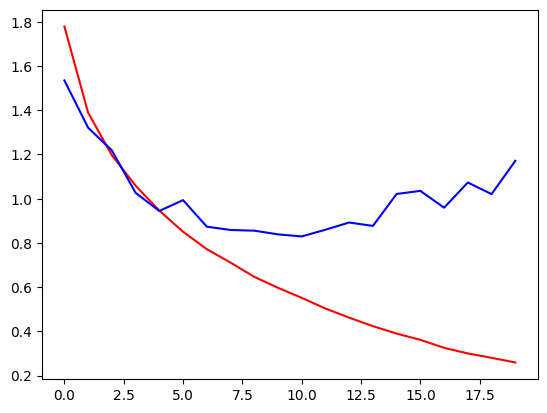

Trying activation function:  Sigmoid
Val loss at epoch 0: 2.01623907438509
Val acc at epoch 0: 0.231
Val loss at epoch 1: 1.9037037229841682
Val acc at epoch 1: 0.2616
Val loss at epoch 2: 1.7932095960446983
Val acc at epoch 2: 0.3216
Val loss at epoch 3: 1.7279446322447176
Val acc at epoch 3: 0.3472
Val loss at epoch 4: 1.697070237177952
Val acc at epoch 4: 0.3644
Val loss at epoch 5: 1.6196041403302721
Val acc at epoch 5: 0.4004
Val loss at epoch 6: 1.5816510277948561
Val acc at epoch 6: 0.4154
Val loss at epoch 7: 1.607423247045772
Val acc at epoch 7: 0.404
Val loss at epoch 8: 1.4911078624664598
Val acc at epoch 8: 0.4538
Val loss at epoch 9: 1.5600079890269383
Val acc at epoch 9: 0.4204
Val loss at epoch 10: 1.4194584359788591
Val acc at epoch 10: 0.4774
Val loss at epoch 11: 1.3824118633938443
Val acc at epoch 11: 0.5022
Val loss at epoch 12: 1.3638786422978542
Val acc at epoch 12: 0.5042
Val loss at epoch 13: 1.3458642982373572
Val acc at epoch 13: 0.506
Val loss at epoch 14: 1.

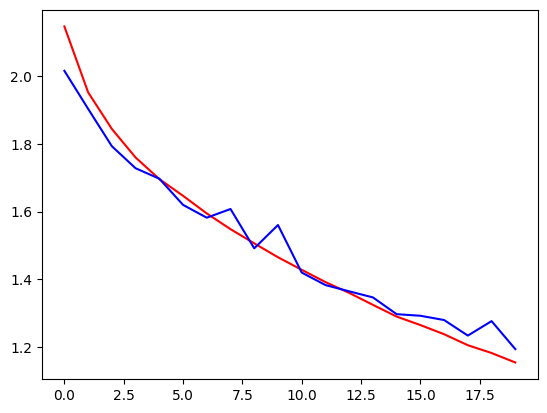

Trying activation function:  ELU
Val loss at epoch 0: 1.3479938951267558
Val acc at epoch 0: 0.5058
Val loss at epoch 1: 1.174579918384552
Val acc at epoch 1: 0.5754
Val loss at epoch 2: 1.0303837968285676
Val acc at epoch 2: 0.6318
Val loss at epoch 3: 0.9740948798550162
Val acc at epoch 3: 0.6608
Val loss at epoch 4: 0.939067289707767
Val acc at epoch 4: 0.6712
Val loss at epoch 5: 0.8862350073399817
Val acc at epoch 5: 0.6938
Val loss at epoch 6: 0.8919442039766129
Val acc at epoch 6: 0.6956
Val loss at epoch 7: 0.8495712669412042
Val acc at epoch 7: 0.7046
Val loss at epoch 8: 0.8702363704040552
Val acc at epoch 8: 0.7054
Val loss at epoch 9: 0.8438005593551952
Val acc at epoch 9: 0.7208
Val loss at epoch 10: 0.8790588733876586
Val acc at epoch 10: 0.705
Val loss at epoch 11: 0.8708442174325324
Val acc at epoch 11: 0.716
Val loss at epoch 12: 0.9419564930306878
Val acc at epoch 12: 0.7106
Val loss at epoch 13: 0.9453093363031461
Val acc at epoch 13: 0.7168
Val loss at epoch 14: 0.9

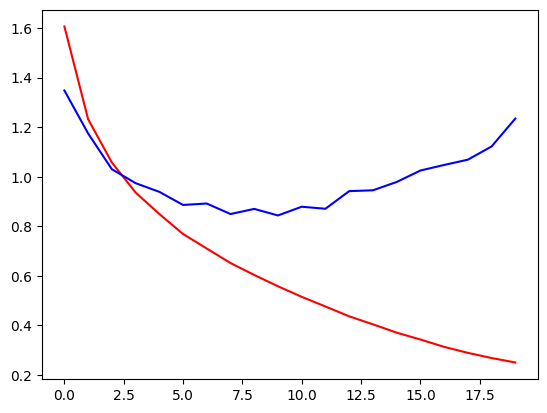

Trying activation function:  PReLU
Val loss at epoch 0: 1.4130120231847094
Val acc at epoch 0: 0.4846
Val loss at epoch 1: 1.204871921782281
Val acc at epoch 1: 0.567
Val loss at epoch 2: 1.121564499132193
Val acc at epoch 2: 0.5958
Val loss at epoch 3: 0.9927318149311527
Val acc at epoch 3: 0.6482
Val loss at epoch 4: 0.8871706872229363
Val acc at epoch 4: 0.6906
Val loss at epoch 5: 0.8637587242065721
Val acc at epoch 5: 0.699
Val loss at epoch 6: 0.8587771722465564
Val acc at epoch 6: 0.696
Val loss at epoch 7: 0.8569586474424714
Val acc at epoch 7: 0.7074
Val loss at epoch 8: 0.8776779472827911
Val acc at epoch 8: 0.705
Val loss at epoch 9: 0.815294224175678
Val acc at epoch 9: 0.7216
Val loss at epoch 10: 0.942923091968913
Val acc at epoch 10: 0.6994
Val loss at epoch 11: 0.9527274873226311
Val acc at epoch 11: 0.7214
Val loss at epoch 12: 0.9268234427187853
Val acc at epoch 12: 0.7116
Val loss at epoch 13: 0.9114769473197354
Val acc at epoch 13: 0.722
Val loss at epoch 14: 0.9996

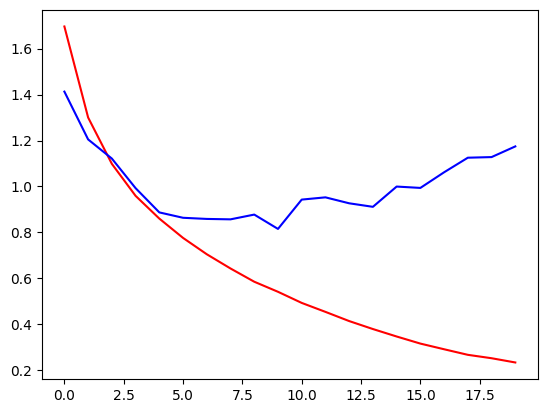

In [8]:
activation_functions = [lambda: LeakyReLU(0.3), lambda: LeakyReLU(0.1), lambda: LeakyReLU(0.03), LeakyReLU, Sigmoid, ELU, PReLU]
activation_functions_str = ["LeakyReLU(0.3)", "LeakyReLU(0.1)", "LeakyReLU(0.03)", "LeakyReLU", "Sigmoid", "ELU", "PReLU"]
losses = {act_f: ([], []) for act_f in activation_functions_str}
accuracies = {act_f: [] for act_f in activation_functions_str}

batch_size = 32

dataloader_train = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
dataloader_val = torch.utils.data.DataLoader(valset, batch_size=batch_size, shuffle=False)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Using device: ", device)

ce_loss = torch.nn.CrossEntropyLoss().to(device)

for activation_function, activation_function_str in zip(activation_functions, activation_functions_str):
  print("Trying activation function: ", activation_function_str)

  model, model_inference = build_model_task2(activation_function)

  model.to(device)
  model_inference.to(device)

  optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

  epoch_train_losses = []
  epoch_val_losses = []
  epoch_val_accs = []

  for e in range(20):
    train_loss, val_loss, val_acc = one_epoch(model, ce_loss, optimizer, dataloader_train, dataloader_val, False)

    print("Val loss at epoch {}: {}".format(e, val_loss))
    print("Val acc at epoch {}: {}".format(e, val_acc))

    epoch_train_losses.append(train_loss)
    epoch_val_losses.append(val_loss)
    epoch_val_accs.append(val_acc)

  losses[activation_function_str][0].append(epoch_train_losses)
  losses[activation_function_str][1].append(epoch_val_losses)
  accuracies[activation_function_str].append(epoch_val_accs)

  plt.plot(epoch_train_losses, c='r')
  plt.plot(epoch_val_losses, c='b')
  plt.show()


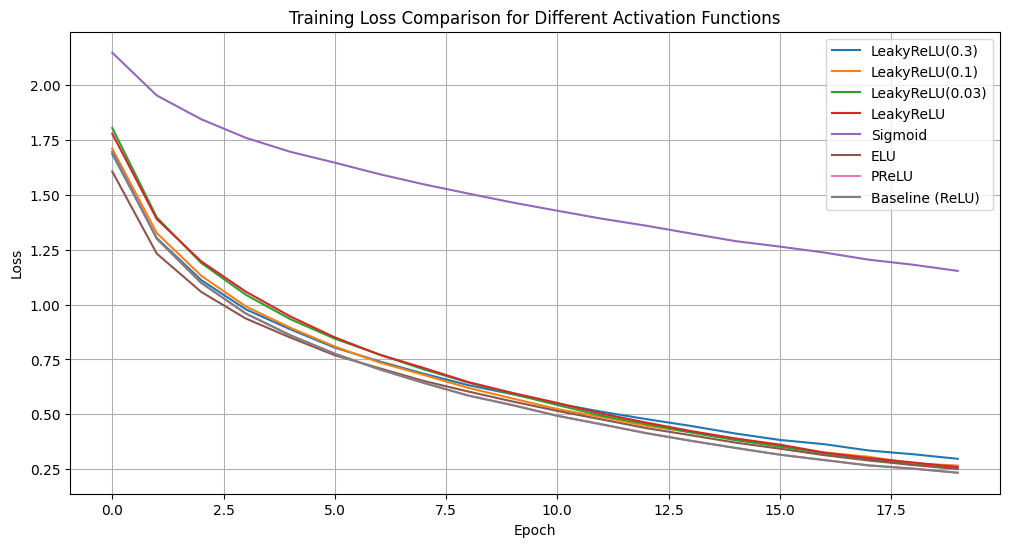

In [9]:
plt.figure(figsize=(12, 6))
for activation_function_str in activation_functions_str:
    plt.plot(losses[activation_function_str][0][0], label=activation_function_str)

# Assuming you have the baseline model's train_losses stored in epoch_train_losses from the previous run
plt.plot(epoch_train_losses, label='Baseline (ReLU)')

plt.title('Training Loss Comparison for Different Activation Functions')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

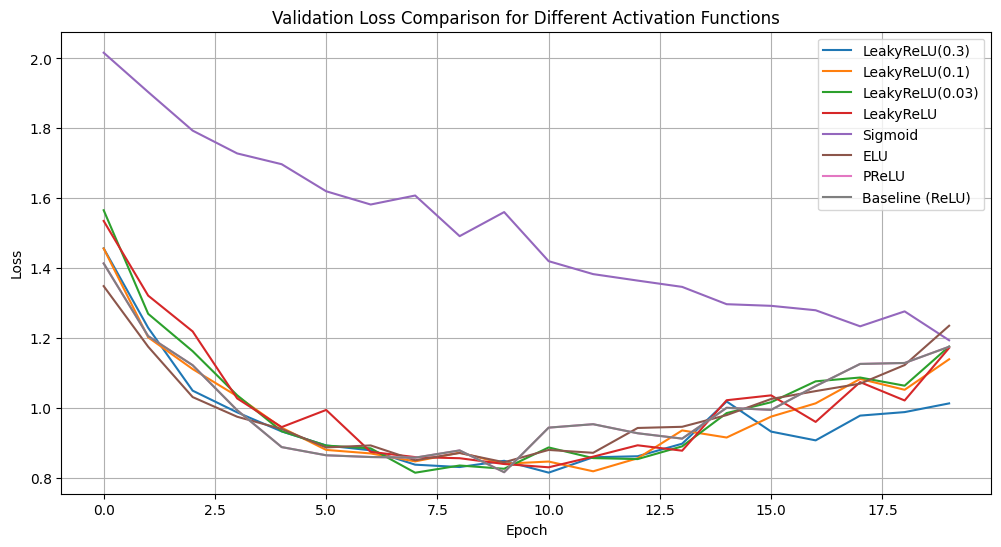

In [11]:
plt.figure(figsize=(12, 6))
for activation_function_str in activation_functions_str:
    plt.plot(losses[activation_function_str][1][0], label=activation_function_str)

# Assuming you have the baseline model's val_losses stored in epoch_val_losses from the previous run
plt.plot(epoch_val_losses, label='Baseline (ReLU)')

plt.title('Validation Loss Comparison for Different Activation Functions')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

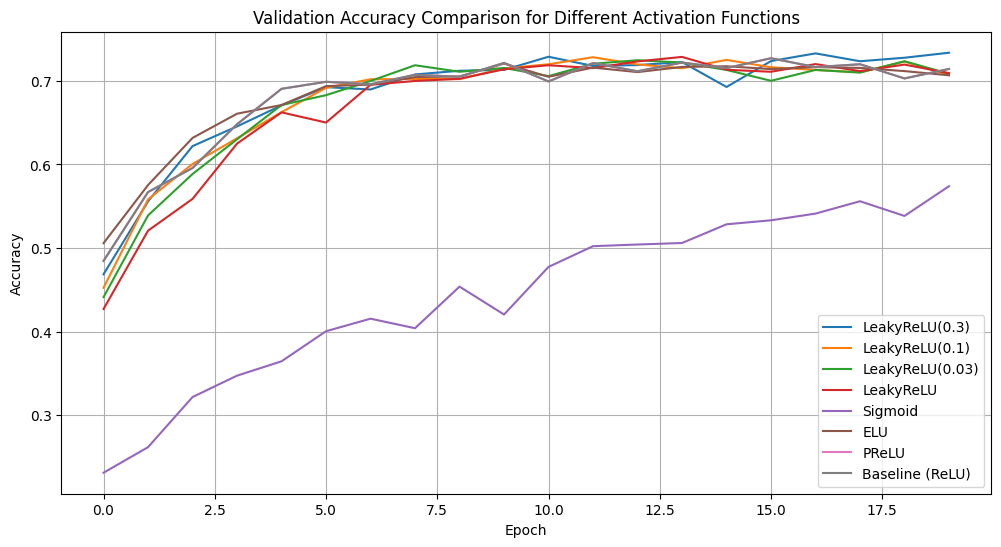

In [12]:
plt.figure(figsize=(12, 6))
for activation_function_str in accuracies.keys():
    plt.plot(accuracies[activation_function_str][0], label=activation_function_str)

# Assuming you have the baseline model's val_accs stored in epoch_val_accs from the previous run
plt.plot(epoch_val_accs, label='Baseline (ReLU)')

plt.title('Validation Accuracy Comparison for Different Activation Functions')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
import pandas as pd

summary_data = {}

# Get baseline results (assuming the last values from the previous runs are stored in these variables)
summary_data['Baseline (ReLU)'] = {
    'Final Train Loss': epoch_train_losses[-1],
    'Final Val Loss': epoch_val_losses[-1],
    'Final Val Accuracy': epoch_val_accs[-1]
}

# Get results for each activation function
for activation_function_str in activation_functions_str:
    summary_data[activation_function_str] = {
        'Final Train Loss': losses[activation_function_str][0][0][-1],
        'Final Val Loss': losses[activation_function_str][1][0][-1],
        'Final Val Accuracy': accuracies[activation_function_str][0][-1]
    }

summary_df = pd.DataFrame.from_dict(summary_data, orient='index')
display(summary_df)

,Final Train Loss,Final Val Loss,Final Val Accuracy
Baseline (ReLU),0.233851,1.174491,0.7144
LeakyReLU(0.3),0.297180,1.012296,0.7338
LeakyReLU(0.1),0.266499,1.138648,0.7070
LeakyReLU(0.03),0.252869,1.175260,0.7086
LeakyReLU,0.259527,1.171107,0.7094
Sigmoid,1.153399,1.192955,0.5740
ELU,0.250839,1.234591,0.7068
PReLU,0.233851,1.174491,0.7144
